# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(city)

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp-273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | praia
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | saint-louis
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | fort-shevchenko
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | dolinsk
Processing Record 21 of Set 1 | h

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,17.25,89,86,0.00,AU,1674572116
1,busselton,-33.6500,115.3333,17.12,84,1,7.11,AU,1674571931
2,new norfolk,-42.7826,147.0587,17.06,72,82,0.56,AU,1674572116
3,bluff,-46.6000,168.3333,10.01,85,10,2.37,NZ,1674572116
4,atuona,-9.8000,-139.0333,25.79,76,1,8.20,PF,1674572116


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,17.25,89,86,0.00,AU,1674572116
1,busselton,-33.6500,115.3333,17.12,84,1,7.11,AU,1674571931
2,new norfolk,-42.7826,147.0587,17.06,72,82,0.56,AU,1674572116
3,bluff,-46.6000,168.3333,10.01,85,10,2.37,NZ,1674572116
4,atuona,-9.8000,-139.0333,25.79,76,1,8.20,PF,1674572116


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

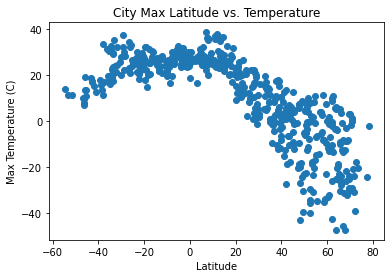

In [29]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

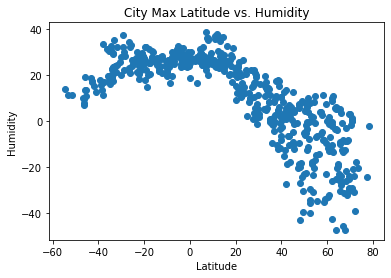

In [30]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude vs. Humidity')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

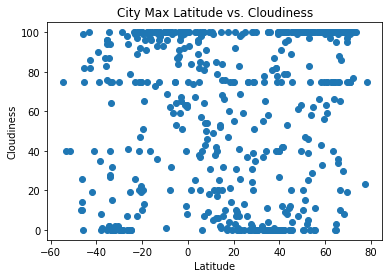

In [32]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

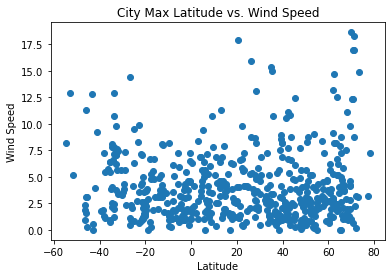

In [33]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Max Latitude vs. Wind Speed')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int


In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_heim_df = city_data_df[city_data_df['Lat'] >= 0 ]

# Display sample data
northern_heim_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,praia,14.9215,-23.5087,25.30,47,20,4.12,CV,1674572060
10,ilulissat,69.2167,-51.1000,-8.36,80,100,1.94,GL,1674572117
11,saint-louis,16.3333,-15.0000,32.33,15,76,1.60,SN,1674572117
12,kodiak,57.7900,-152.4072,2.59,93,100,2.28,US,1674572118
13,khatanga,71.9667,102.5000,-39.37,96,77,3.20,RU,1674572118


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_heim_df = city_data_df[city_data_df['Lat'] <= 0 ]

# Display sample data
southern_heim_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,17.25,89,86,0.00,AU,1674572116
1,busselton,-33.6500,115.3333,17.12,84,1,7.11,AU,1674571931
2,new norfolk,-42.7826,147.0587,17.06,72,82,0.56,AU,1674572116
3,bluff,-46.6000,168.3333,10.01,85,10,2.37,NZ,1674572116
4,atuona,-9.8000,-139.0333,25.79,76,1,8.20,PF,1674572116


###  Temperature vs. Latitude Linear Regression Plot

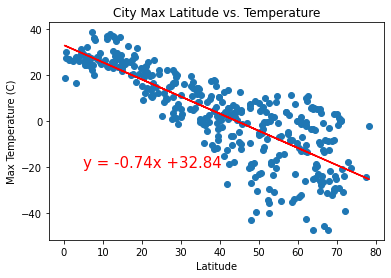

The coefficient of determination is: 0.6537780280853523


In [53]:


# Build scatter plot for latitude vs. temperature
x_values = northern_heim_df['Lat']
y_values = northern_heim_df['Max Temp']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.plot(x_values, line, "r-", )
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The coefficient of determination is: " + str(r*r))

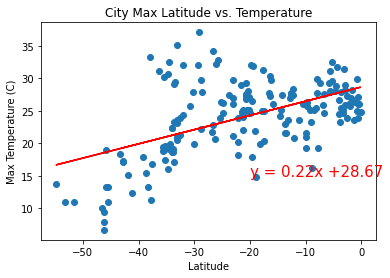

The coefficient of determination is: 0.279471542618977


In [52]:
# Build scatter plot for latitude vs. temperature
x_values = southern_heim_df['Lat']
y_values = southern_heim_df['Max Temp']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.plot(x_values, line, "r-", )
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The coefficient of determination is: " + str(r*r))

**Discussion about the linear relationship:** 

The linear relationship shows that in general as the city's latitude gets further away from the equator (latitude 0) the average temperature correlates to a decrease in temperature.



### Humidity vs. Latitude Linear Regression Plot

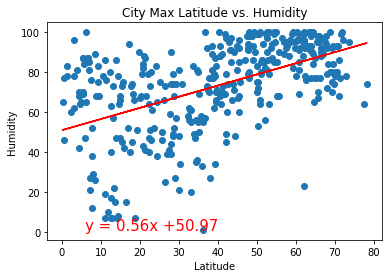

The coefficient of determination is: 0.26612463034437245


In [48]:
# Build scatter plot for Latitude vs. Humidity

x_values = northern_heim_df['Lat']
y_values = northern_heim_df['Humidity']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude vs. Humidity')
plt.plot(x_values, line, "r-", )
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The coefficient of determination is: " + str(r*r))

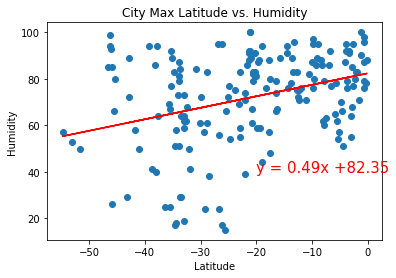

The coefficient of determination is: 0.11482991258280982


In [56]:
# Southern Hemisphere
# Build scatter plot for Latitude vs. Humidity
x_values = southern_heim_df['Lat']
y_values = southern_heim_df['Humidity']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude vs. Humidity')
plt.plot(x_values, line, "r-", )
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The coefficient of determination is: " + str(r*r))

**Discussion about the linear relationship:**
The linear relationship shows that in general as the city's latitude increases the average temperature correlates to an increase in Humidity

### Cloudiness vs. Latitude Linear Regression Plot

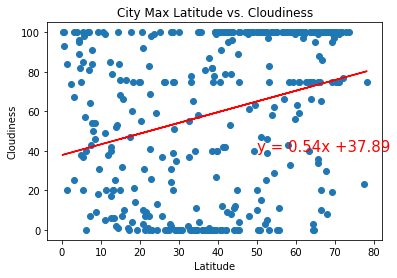

The coefficient of determination is: 0.08044656269458936


In [59]:
# Northern Hemisphere
# Build scatter plot for Latitude vs. Cloudiness
x_values = northern_heim_df['Lat']
y_values = northern_heim_df['Cloudiness']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude vs. Cloudiness')
plt.plot(x_values, line, "r-", )
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The coefficient of determination is: " + str(r*r))

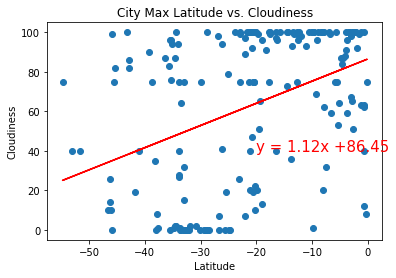

The coefficient of determination is: 0.15970116110178506


In [60]:
# Southern Hemisphere
# Build scatter plot for Latitude vs. Cloudiness
x_values = southern_heim_df['Lat']
y_values = southern_heim_df['Cloudiness']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude vs. Cloudiness')
plt.plot(x_values, line, "r-", )
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The coefficient of determination is: " + str(r*r))

**Discussion about the linear relationship:**
The linear relationship between City Cloudiness and Latitude shows that as Latitude increases cloudiness is also likely to rise

### Wind Speed vs. Latitude Linear Regression Plot

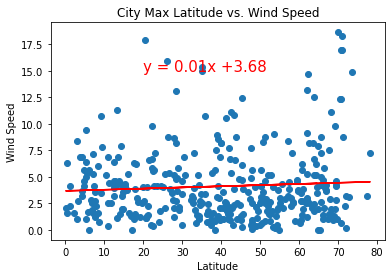

The coefficient of determination is: 0.004396011526382766


In [65]:
# Northern Hemisphere

# Build scatter plot for Latitude vs. Wind Speed
x_values = northern_heim_df['Lat']
y_values = northern_heim_df['Wind Speed']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Max Latitude vs. Wind Speed')
plt.plot(x_values, line, "r-", )
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The coefficient of determination is: " + str(r*r))

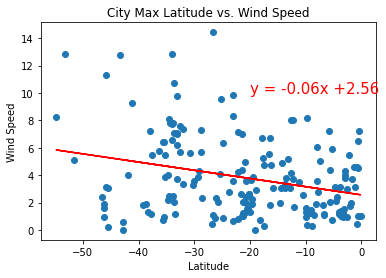

The coefficient of determination is: 0.0801050915135481


In [66]:
# Southern Hemisphere

# Build scatter plot for Latitude vs. Wind Speed
x_values = southern_heim_df['Lat']
y_values = southern_heim_df['Wind Speed']

# Linear regression on Northern Hemisphere

slope, int, r, p, std_err = st.linregress(x_values, y_values)
line=slope*x_values+int
line_eq="y = " + str(round(slope,2)) + "x +" + str(round(int,2))
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Max Latitude vs. Wind Speed')
plt.plot(x_values, line, "r-", )
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

print("The coefficient of determination is: " + str(r*r))

**Discussion about the linear relationship:**
The linear relationship between City Wind Speed and Latitude shows that as Latitude increases in the southern hemisphere, wind speeds are likely to drop. However in the northern hemisphere, latitude does not seem to correlate to any change in wind speed.